In [ ]:
import cv2
import numpy as np

def get_chain_code(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Threshold the image to get a binary representation
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract the chain code from the first contour (assuming there's only one digit in the image)
    chain_code = []
    if contours:
        contour = contours[0]
        for point in contour:
            # Get the direction code based on the difference between consecutive points
            x, y = point.ravel()
            chain_code.append(get_direction_code(x, y, contour))

    return chain_code

def get_direction_code(x, y, contour_points):
    # Define directions: 0 for right, 1 for down-right, 2 for down, etc.
    directions = [(1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1)]

    # Find the direction code based on the change in coordinates
    for i, (dx, dy) in enumerate(directions):
        for point in contour_points:
            px, py = point.ravel()
            if x + dx == px and y + dy == py:
                return i

if __name__ == "__main__":
    # Replace 'your_image_path.png' with the actual path to your digit image
    image_path = '/content/5cff802d48d74607ac929ec2751684e9.jpg'

    # Get the chain code for the digit image
    chain_code = get_chain_code(image_path)

    # Print the chain code
    print("Chain Code:", chain_code)


Chain Code: [None, None, None, None]


In [ ]:
import cv2
import numpy as np

# Load your image
image = cv2.imread('/content/Screenshot 2024-02-15 113605.png', cv2.IMREAD_GRAYSCALE)

# Preprocessing (If needed - Thresholding example)
_, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if contours were found
if contours:
    contour = contours[0]

    # Get the chain code
    chain_code = contour[:, 0].tolist()

    # Process the chain code
    for i in range(len(chain_code)):
        x1, y1 = chain_code[i - 1]
        x2, y2 = chain_code[i]
        direction = calculate_direction(x1, y1, x2, y2)
        print(direction)

else:
    print("No contours found in the image.")

# Helper function to calculate the direction
def calculate_direction(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1

    # Determine direction based on dx and dy (implement your 4 or 8-directional logic)
    if dx == 0 and dy > 0:
        return 2  # Example:  direction '2' represents 'down'
    # ... Add other directions
    else:
        return 0  # Default in case the logic doesn't match


0
2
0
0
0
0
0


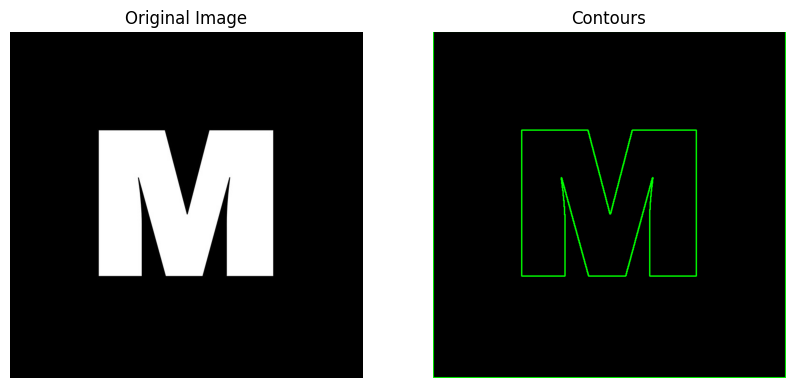

Chain Code for Contour 
 1 : [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Chain Code for Contour 
 2 : [0, 0, 0, 0, 2, 2, 2, 1, 1, 6, 7, 7, 6, 6, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 6, 6, 6, 6, 6, 6, 2, 3, 2, 3, 2, 3, 4, 4, 6, 6, 6, 6, 5, 6, 1, 2, 2, 2, 2, 2, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/flat,750x,075,f-pad,750x1000,f8f8f8.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)
# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Display the original image and contour image using pyplot
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Contour image
contour_image = np.zeros_like(image)
for contour in contours:
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.axis('off')

plt.show()

# Generate chain code for each contour
for i, contour in enumerate(contours):
    chain_code = []
    for j in range(1, len(contour)):
      if j%35==0:
        # Calculate the direction from the previous point to the current one
        dx = contour[j][0][0] - contour[j-1][0][0]
        dy = contour[j][0][1] - contour[j-1][0][1]

        # Encode the direction into a chain code
        if dx == 1 and dy == 0:
            chain_code.append(0)
        elif dx == 1 and dy == 1:
            chain_code.append(1)
        elif dx == 0 and dy == 1:
            chain_code.append(2)
        elif dx == -1 and dy == 1:
            chain_code.append(3)
        elif dx == -1 and dy == 0:
            chain_code.append(4)
        elif dx == -1 and dy == -1:
            chain_code.append(5)
        elif dx == 0 and dy == -1:
            chain_code.append(6)
        elif dx == 1 and dy == -1:
            chain_code.append(7)

    # Print the chain code for each contour
    print("Chain Code for Contour \n", i+1, ":", chain_code)


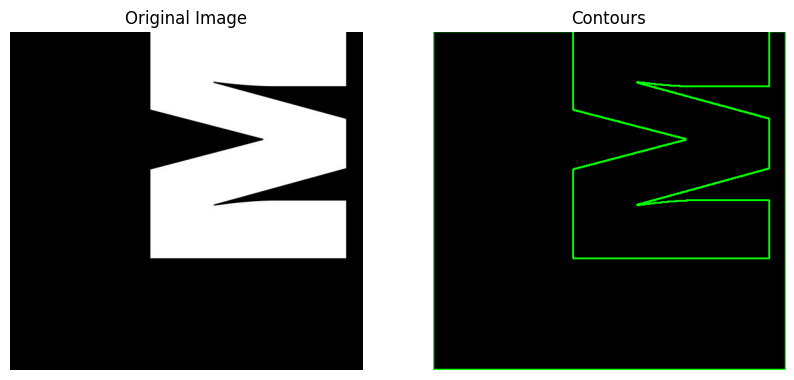

Chain Code for Contour 
 1 : [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 2, 2, 4, 4, 4, 4, 4, 4, 0, 1, 0, 1, 0, 1, 2, 2, 4, 4, 4, 4, 3, 4, 7, 0, 0, 0, 0, 0, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 0, 0, 0, 0, 7, 4, 5, 5, 5, 4, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/flat,750x,075,f-pad,750x1000,f8f8f8.jpg')

m=cv2.getRotationMatrix2D((558/2,536/2),90,1)
image1=cv2.warpAffine(image,m,(558,536))

# Convert the image to grayscale
gray_image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)
# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Display the original image and contour image using pyplot
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Contour image
contour_image = np.zeros_like(image1)
for contour in contours:
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.axis('off')

plt.show()

# Generate chain code for each contour
for i, contour in enumerate(contours):
    chain_code = []
    for j in range(1, len(contour)):
      if j%35==0:
        # Calculate the direction from the previous point to the current one
        dx = contour[j][0][0] - contour[j-1][0][0]
        dy = contour[j][0][1] - contour[j-1][0][1]

        # Encode the direction into a chain code
        if dx == 1 and dy == 0:
            chain_code.append(0)
        elif dx == 1 and dy == 1:
            chain_code.append(1)
        elif dx == 0 and dy == 1:
            chain_code.append(2)
        elif dx == -1 and dy == 1:
            chain_code.append(3)
        elif dx == -1 and dy == 0:
            chain_code.append(4)
        elif dx == -1 and dy == -1:
            chain_code.append(5)
        elif dx == 0 and dy == -1:
            chain_code.append(6)
        elif dx == 1 and dy == -1:
            chain_code.append(7)

    # Print the chain code for each contour
    print("Chain Code for Contour \n", i+1, ":", chain_code)
